In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

C:\Users\Jahanvi B Dinesh\AppData\Local\Temp\ipykernel_14256\2968492016.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the original image
original_image = pd.read_csv(r"C:\Users\Jahanvi B Dinesh\OneDrive\Study Period 6\Advanced Probabilistic Machine Learning\homeworks\HW4\letterA.csv""").to_numpy()

In [3]:
# Function to add Gaussian noise
def add_gaussian_noise(image, std_dev):
    noisy_image = image + np.random.normal(0, std_dev, image.shape)
    return np.clip(noisy_image, -1, 1)

In [5]:
# Function to add salt-and-pepper noise
def add_salt_pepper_noise(image, prob):
    noisy_image = image.copy()
    num_pixels = image.size
    num_salt = int(prob * num_pixels / 2)
    num_pepper = int(prob * num_pixels / 2)
    
    # Add salt noise
    coords_salt = np.unravel_index(np.random.choice(num_pixels, num_salt, replace=False), image.shape)
    noisy_image[coords_salt] = 1
    
    # Add pepper noise
    coords_pepper = np.unravel_index(np.random.choice(num_pixels, num_pepper, replace=False), image.shape)
    noisy_image[coords_pepper] = -1
    
    return noisy_image

In [6]:
# ICM algorithm
def icm_optimized(noisy_image, h, beta, eta, max_iter=50):
    denoised_image = noisy_image.copy()
    kernel = np.ones((3, 3))  # Kernel for neighborhood summation
    
    for _ in range(max_iter):
        # Compute neighborhood sums efficiently
        neighbors_sum = convolve2d(denoised_image, kernel, mode='same', boundary='symm') - denoised_image
        
        # Compute energies for both states
        E_pos = h + beta * neighbors_sum + eta * noisy_image
        E_neg = -h - beta * neighbors_sum - eta * noisy_image
        
        # Update pixel states
        denoised_image = np.where(E_pos < E_neg, 1, -1)
    
    return denoised_image

In [7]:
# Compute NMSE
def compute_nmse(denoised_image, ground_truth):
    return np.linalg.norm(denoised_image - ground_truth)**2 / np.linalg.norm(ground_truth)**2

In [8]:
# Task Q1: Simulate noisy images with varying noise levels
std_devs = [0.1, 0.3, 0.5, 0.7, 1.0]  # Gaussian noise levels
probs = [0.05, 0.1, 0.15, 0.2, 0.3]  # Salt-and-pepper noise levels

noisy_gaussian = [add_gaussian_noise(original_image, std) for std in std_devs]
noisy_sp = [add_salt_pepper_noise(original_image, prob) for prob in probs]

In [9]:
# Task Q2: Implement ICM algorithm
h, beta, eta = 0.1, 0.2, 0.5  # Example parameters
max_iter = 50

denoised_gaussian = [icm_optimized(img, h, beta, eta, max_iter) for img in noisy_gaussian]
denoised_sp = [icm_optimized(img, h, beta, eta, max_iter) for img in noisy_sp]

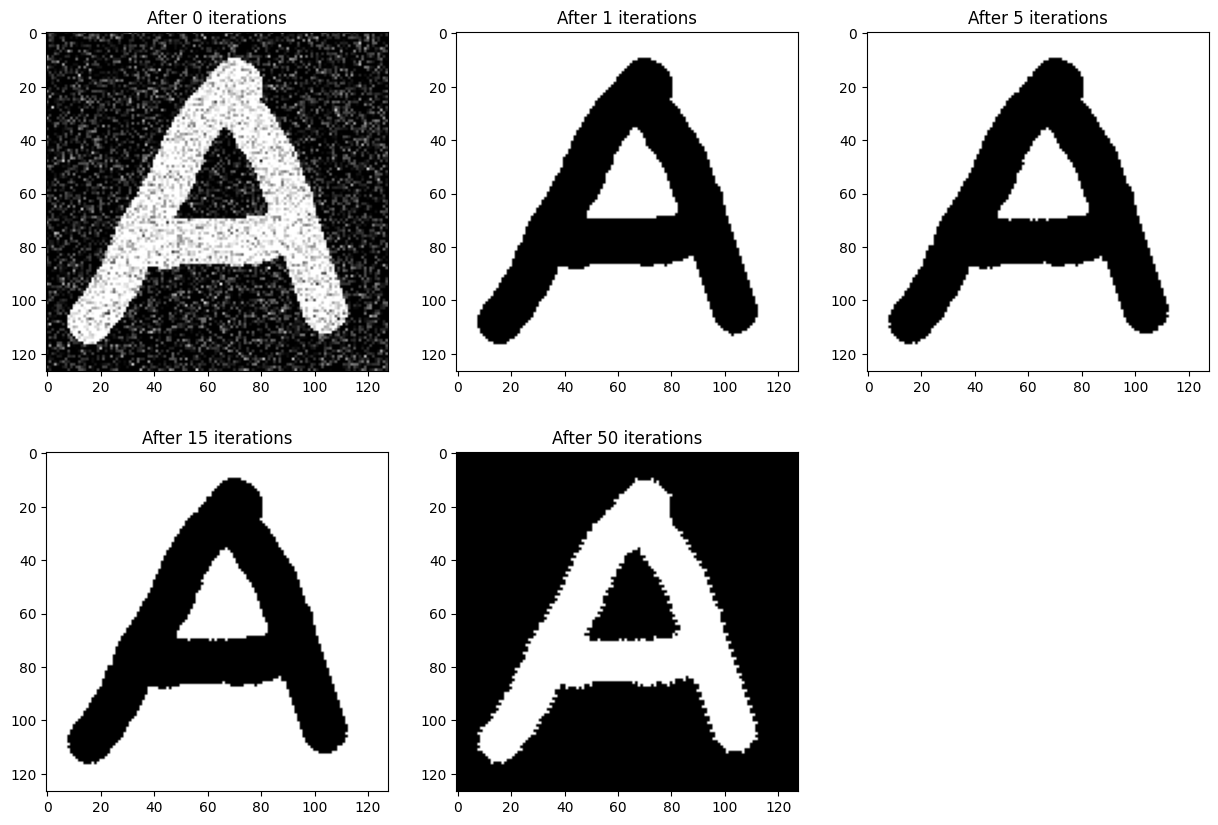

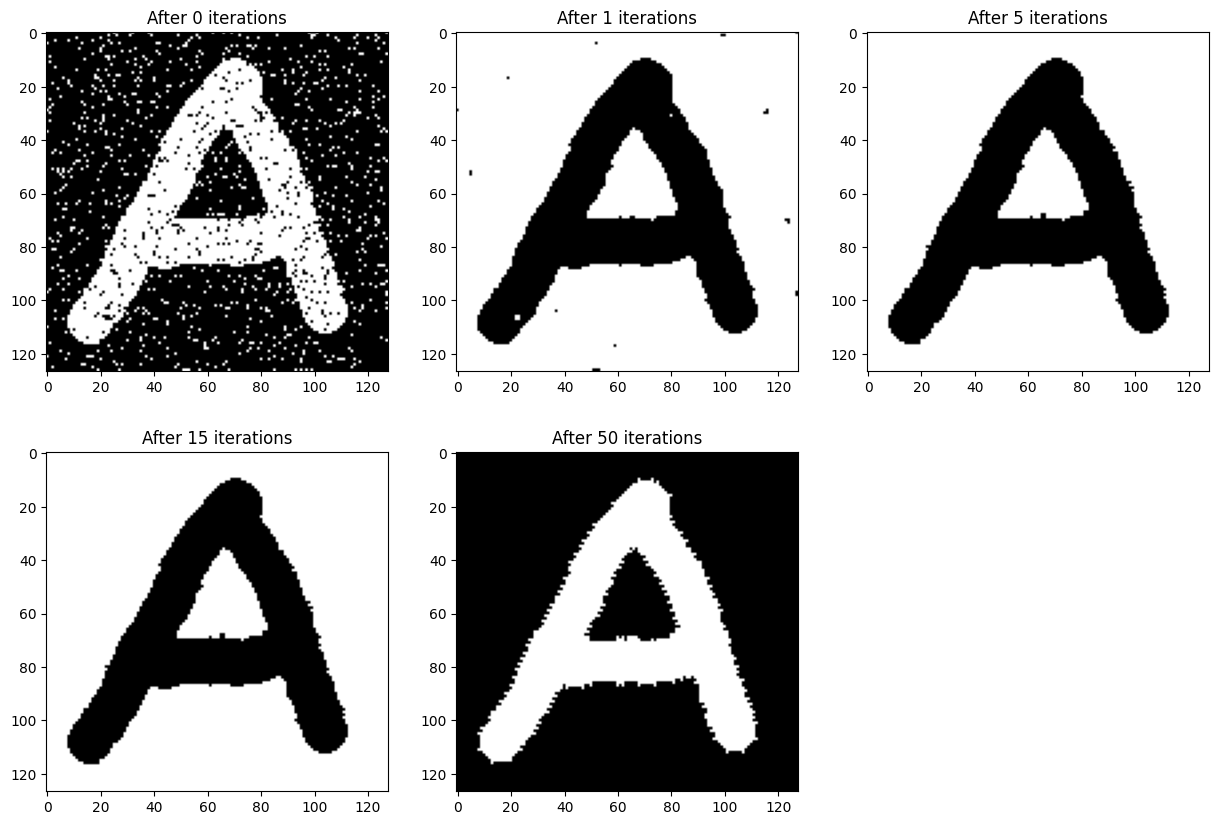

In [ ]:
# Task Q3: Plot denoised images at various iterations - Gaussian
iterations = [0, 1, 5, 15, 50]
plt.figure(figsize=(15, 10))
for idx, iters in enumerate(iterations):
    denoised_g = icm_optimized(noisy_gaussian[2], h, beta, eta, max_iter=iters)
    plt.subplot(2, 3, idx + 1)
    plt.title(f"After {iters} iterations")
    plt.imshow(denoised_g, cmap='gray')
plt.show()

# Task Q3: Plot denoised images at various iterations - S&P
iterations = [0, 1, 5, 15, 50]
plt.figure(figsize=(15, 10))
for idx, iters in enumerate(iterations):
    denoised_s = icm_optimized(noisy_sp[2], h, beta, eta, max_iter=iters)
    plt.subplot(2, 3, idx + 1)
    plt.title(f"After {iters} iterations")
    plt.imshow(denoised_s, cmap='gray')
plt.show()


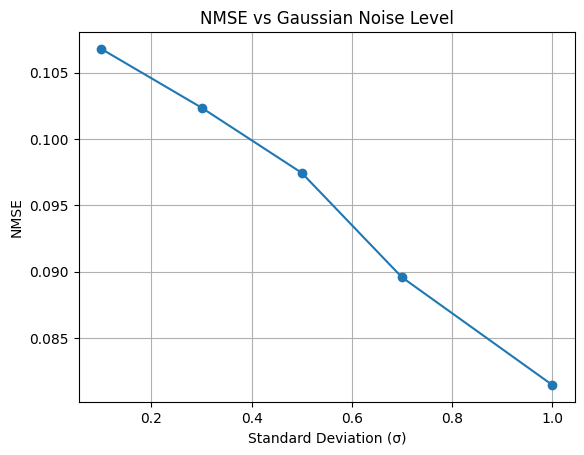

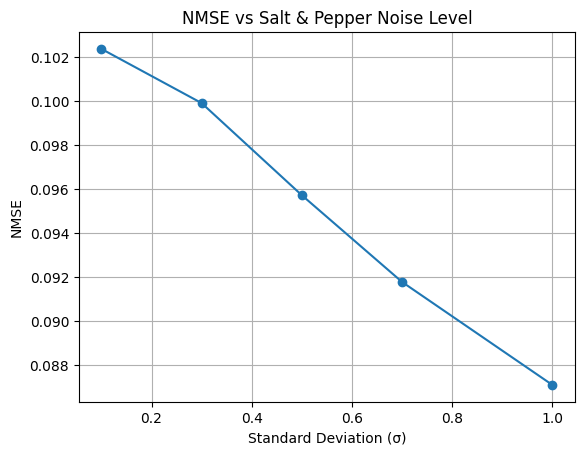

In [12]:
# Task Q4: Compute and plot NMSE
nmse_gaussian = [compute_nmse(denoised, original_image) for denoised in denoised_gaussian]
plt.plot(std_devs, nmse_gaussian, marker='o')
plt.title("NMSE vs Gaussian Noise Level")
plt.xlabel("Standard Deviation (σ)")
plt.ylabel("NMSE")
plt.grid()
plt.show()

nmse_sp = [compute_nmse(denoised, original_image) for denoised in denoised_sp]
plt.plot(std_devs, nmse_sp, marker='o')
plt.title("NMSE vs Salt & Pepper Noise Level")
plt.xlabel("Standard Deviation (σ)")
plt.ylabel("NMSE")
plt.grid()
plt.show()

In [ ]:
# Task Q6a: Vary parameters h, beta, eta and evaluate their impact - Gaussian
h_values = np.linspace(0.1, 1.0, 10)
beta_values = np.linspace(0.1, 1.0, 10)
eta_values = np.linspace(0.1, 1.0, 10)

nmse_hg = [compute_nmse(icm_optimized(noisy_gaussian[2], h, 0.2, 0.5, max_iter), original_image) for h in h_values]
nmse_betag = [compute_nmse(icm_optimized(noisy_gaussian[2], 0.1, beta, 0.5, max_iter), original_image) for beta in beta_values]
nmse_etag = [compute_nmse(icm_optimized(noisy_gaussian[2], 0.1, 0.2, eta, max_iter), original_image) for eta in eta_values]

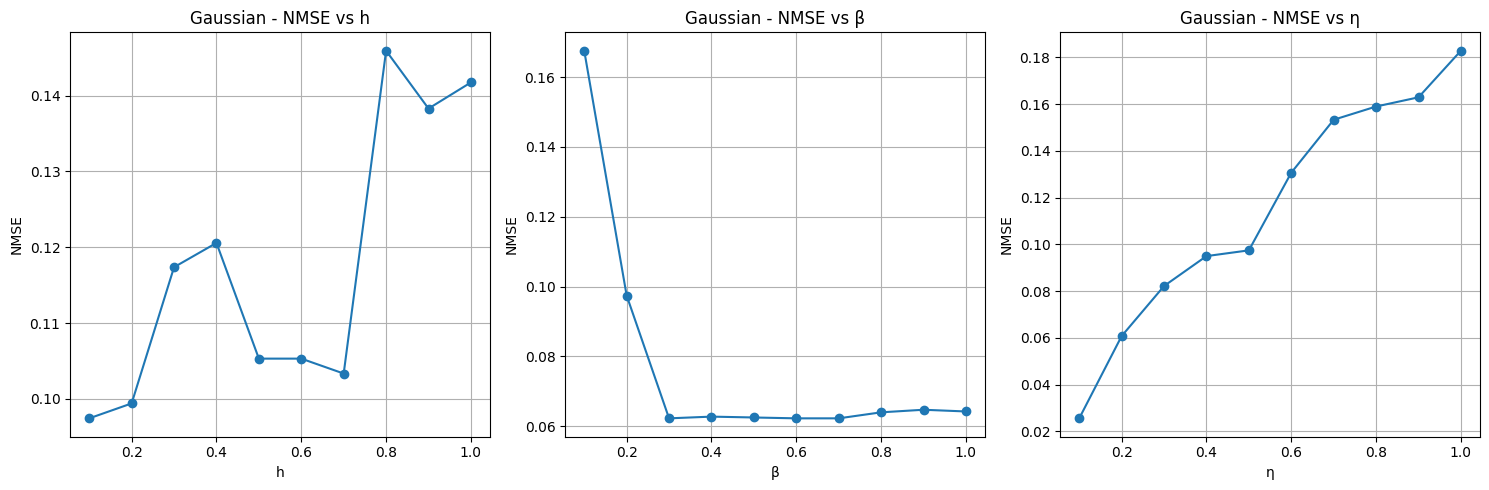

In [ ]:
# Task Q7a: Plot NMSE against h, beta, eta - Gaussian
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(h_values, nmse_hg, marker='o')
plt.title("Gaussian - NMSE vs h")
plt.xlabel("h")
plt.ylabel("NMSE")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(beta_values, nmse_betag, marker='o')
plt.title("Gaussian - NMSE vs β")
plt.xlabel("β")
plt.ylabel("NMSE")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(eta_values, nmse_etag, marker='o')
plt.title("Gaussian - NMSE vs η")
plt.xlabel("η")
plt.ylabel("NMSE")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Task Q6b: Vary parameters h, beta, eta and evaluate their impact - Salt & Pepper
h_values = np.linspace(0.1, 1.0, 10)
beta_values = np.linspace(0.1, 1.0, 10)
eta_values = np.linspace(0.1, 1.0, 10)

nmse_hsp = [compute_nmse(icm_optimized(noisy_sp[2], h, 0.2, 0.5, max_iter), original_image) for h in h_values]
nmse_betasp = [compute_nmse(icm_optimized(noisy_sp[2], 0.1, beta, 0.5, max_iter), original_image) for beta in beta_values]
nmse_etasp = [compute_nmse(icm_optimized(noisy_sp[2], 0.1, 0.2, eta, max_iter), original_image) for eta in eta_values]

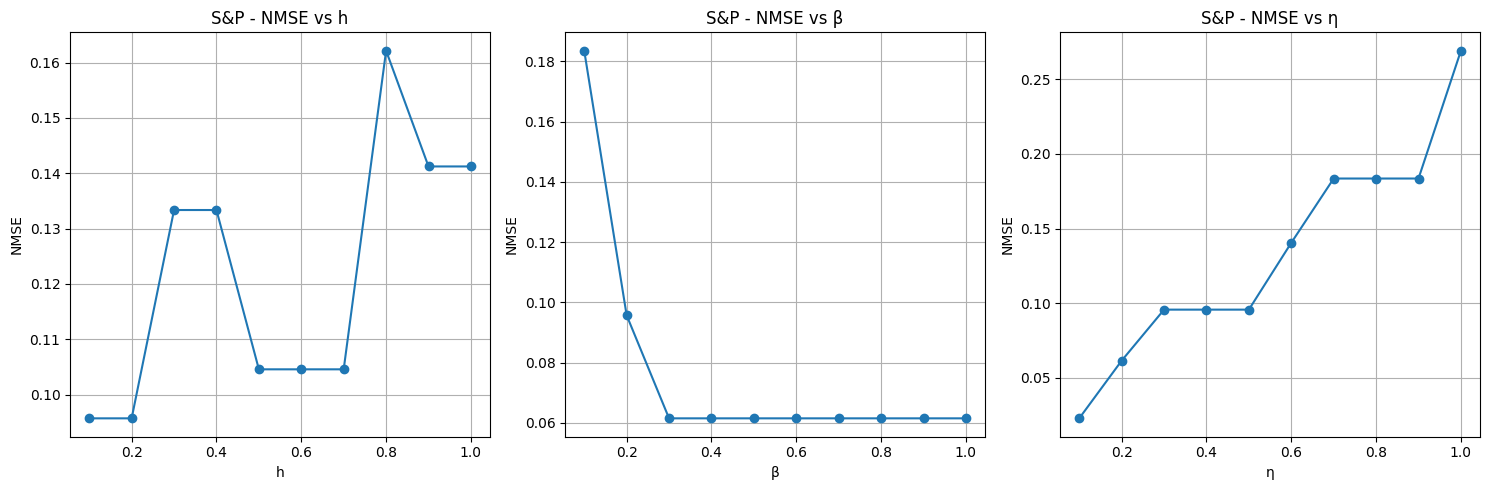

In [ ]:
# Task Q7b: Plot NMSE against h, beta, eta - Salt & Pepper
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(h_values, nmse_hsp, marker='o')
plt.title("S&P - NMSE vs h")
plt.xlabel("h")
plt.ylabel("NMSE")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(beta_values, nmse_betasp, marker='o')
plt.title("S&P - NMSE vs β")
plt.xlabel("β")
plt.ylabel("NMSE")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(eta_values, nmse_etasp, marker='o')
plt.title("S&P - NMSE vs η")
plt.xlabel("η")
plt.ylabel("NMSE")
plt.grid()
plt.tight_layout()
plt.show()